In [12]:
from PIL import Image
from IPython.display import display
import numpy as np

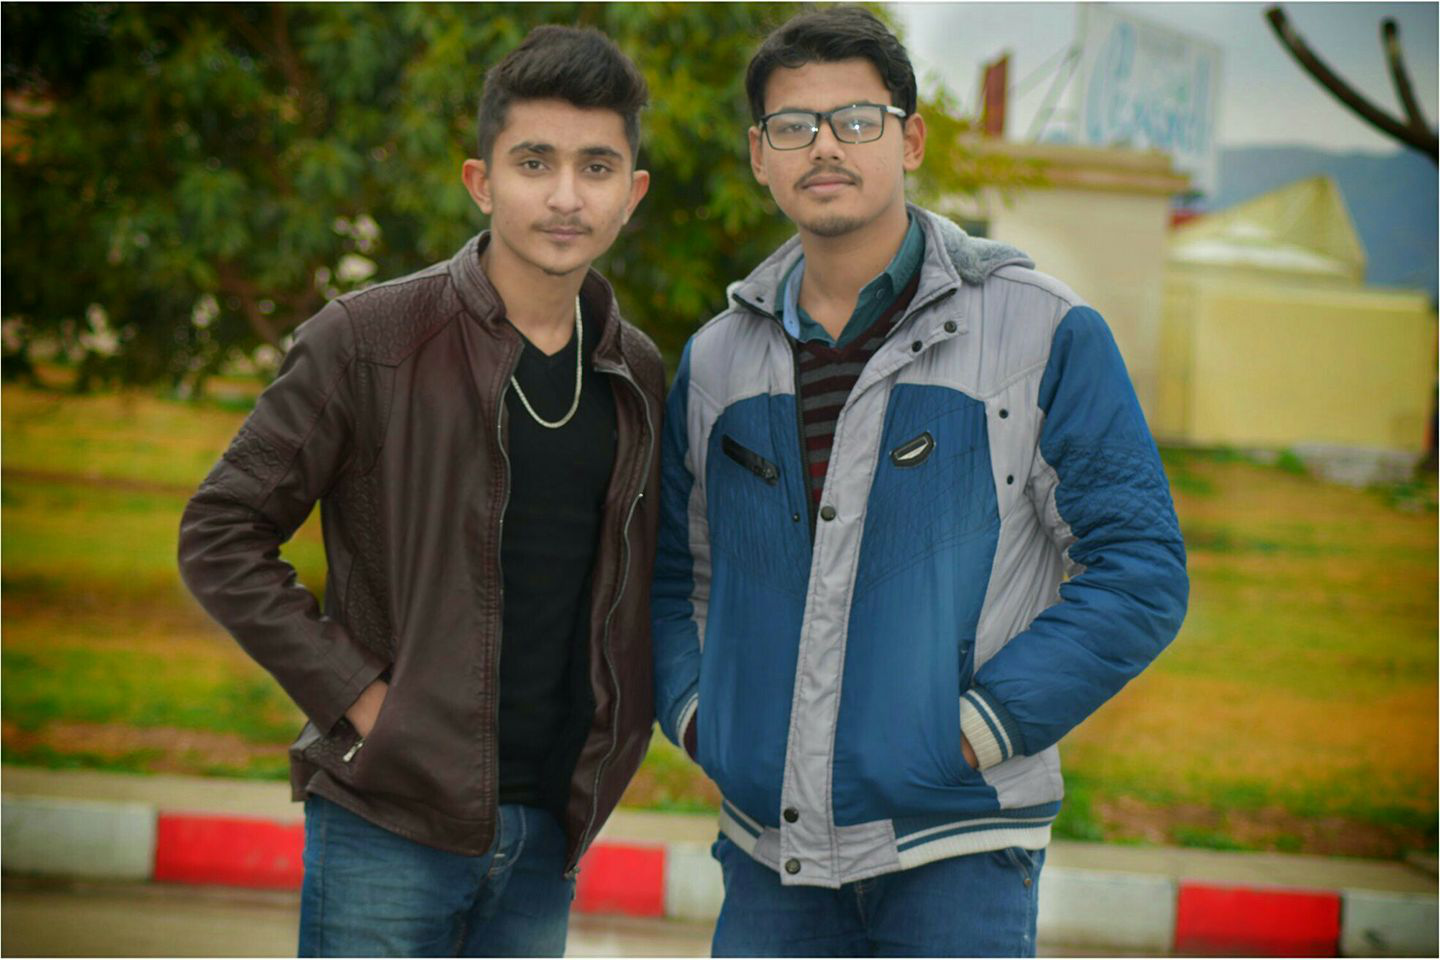

In [13]:
im = Image.open("temp.jpg")
display(im)

In [14]:
array = np.array(im)
print(array.shape)
#array

#lets create the mask 
mask =np.full(array.shape ,255)
#mask


# let subtract the mask from the array 
modified_Array  =  array - mask
#modified_Array


#let convert each -ve number into +ve by multiply by -1
#hint there should "*" Sign closed to the brackets
modified_Array = modified_Array * -1
# modified_Array


#Now last step to tell the numpy all the data is correctly sattled
modified_Array = modified_Array.astype(np.uint8)
# modified_Array


#display(Image.fromarray(modified_Array))

(960, 1440, 3)


In [15]:
#let do good practice to pack all the process into the one function

In [16]:
def make_mask():
    array = np.array(im)
    print(array.shape)
    array

    #lets create the mask 
    mask =np.full(array.shape ,255)
    mask


    # let subtract the mask from the array 
    modified_Array  =  array - mask
    modified_Array


    #let convert each -ve number into +ve by multiply by -1
    #hint there should "*" Sign closed to the brackets
    modified_Array = modified_Array * -1
    modified_Array


    #Now last step to tell the numpy all the data is correctly sattled
    modified_Array = modified_Array.astype(np.uint8)
    modified_Array
    
    display(Image.fromarray(modified_Array))

In [17]:
#make_mask()

reshape = np.reshape(modified_Array,(100,100))
print(reshape)

# indexing Slicing and iterating

In [41]:
# First we are going to look at integer indexing. A one-dimensional array, works in similar ways as a list -
# To get an element in a one-dimensional array, we simply use the offset index.
a = np.array([1,3,5,7])
a[2]

5

In [42]:
# For multidimensional array, we need to use integer array indexing, let's create a new multidimensional array
a = np.array([[1,2], [3, 4], [5, 6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [43]:
# if we want to select one certain element, we can do so by entering the index, which is comprised of two
# integers the first being the row, and the second the column
a[1,1] # remember in python we start at 0!

4

In [47]:
# if we want to get multiple elements 
# for example, 1, 4, and 6 and put them into a one-dimensional array
# we can enter the indices directly into an array function
np.array([a[0, 3], a[2, 3], a[3, 4]])
a

IndexError: index 3 is out of bounds for axis 1 with size 2

# Boolean Indexing

In [51]:
a


array([[1, 2],
       [3, 4],
       [5, 6]])

In [52]:
a > 1

array([[False,  True],
       [ True,  True],
       [ True,  True]])

## Slicing

In [65]:
a = np.array([1,2,3,4,4])
print(a[1:])
print(a[0:2])
print(a[1:3 ,-1:])

[2 3 4 4]
[1 2]


IndexError: too many indices for array

In [66]:
wines =np.genfromtxt("winequality-red.csv" ,delimiter=";" , skip_header=1)
wines

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [73]:
print(wines)


[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [83]:
print(wines[:,2 ]) #getting first column

[0.   0.   0.04 ... 0.13 0.12 0.47]


In [84]:
# If we want a range of columns in order, say columns 0 through 3 (recall, this means first, second, and
# third, since we start at zero and don't include the training index value), we can do that too
wines[:, 0:3] 

array([[7.4  , 0.7  , 0.   ],
       [7.8  , 0.88 , 0.   ],
       [7.8  , 0.76 , 0.04 ],
       ...,
       [6.3  , 0.51 , 0.13 ],
       [5.9  , 0.645, 0.12 ],
       [6.   , 0.31 , 0.47 ]])

In [89]:
# What if we want several non-consecutive columns? We can place the indices of the columns that we want into
# an array and pass the array as the second argument. Here's an example
wines[:, [0,2,4]]
wines[: , [0,1,2,3,4]].mean()
wines[: , [0,1,2,3,4]].max()
wines[: , [0,1,2,3,4]].min()

0.0

In [90]:
# We can specify data field names when using genfromtxt() to loads CSV data. Also, we can have numpy try and
# infer the type of a column by setting the dtype parameter to None
graduate_admission = np.genfromtxt('datasets/Admission_Predict.csv', dtype=None, delimiter=',', skip_header=1,
                                   names=('Serial No','GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
                                          'LOR','CGPA','Research', 'Chance of Admit'))
graduate_admission

OSError: datasets/Admission_Predict.csv not found.

In [91]:
# Notice that the resulting array is actually a one-dimensional array with 400 tuples
graduate_admission.shape

NameError: name 'graduate_admission' is not defined

In [92]:
# Since the GPA in the dataset range from 1 to 10, and in the US it's more common to use a scale of up to 4,
# a common task might be to convert the GPA by dividing by 10 and then multiplying by 4
graduate_admission['CGPA'] = graduate_admission['CGPA'] /10 *4
graduate_admission['CGPA'][0:20] #let's get 20 values

NameError: name 'graduate_admission' is not defined

In [93]:
# Recall boolean masking. We can use this to find out how many students have had research experience by
# creating a boolean mask and passing it to the array indexing operator
len(graduate_admission[graduate_admission['Research'] == 1])

NameError: name 'graduate_admission' is not defined

In [94]:
# Since we have the data field chance of admission, which ranges from 0 to 1, we can try to see if students
# with high chance of admission (>0.8) on average have higher GRE score than those with lower chance of
# admission (<0.4)

# So first we use boolean masking to pull out only those students we are interested in based on their chance
# of admission, then we pull out only their GPA scores, then we print the mean values.
print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['GRE_Score'].mean())
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['GRE_Score'].mean())


NameError: name 'graduate_admission' is not defined

In [95]:
# Take a moment to reflect here, do you understand what is happening in these calls?

# When we do the boolean masking we are left with an array with tuples in it still, and numpy holds underneath
# this a list of the columns we specified and their name and indexes
graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]

NameError: name 'graduate_admission' is not defined

In [96]:
# Let's also do this with GPA
print(graduate_admission[graduate_admission['Chance_of_Admit'] > 0.8]['CGPA'].mean())
print(graduate_admission[graduate_admission['Chance_of_Admit'] < 0.4]['CGPA'].mean())

NameError: name 'graduate_admission' is not defined

In [ ]:
# Hrm, well, I guess one could have expected this. The GPA and GRE for students who have a higher chance of
# being admitted, at least based on our cursory look here, seems to be higher.
